# Neural Network From Scratch

Many real-world phenomena display complex nonlinear patterns and interactions, which linear regression fails to capture effectively. In contrast, neural networks excel in this area by enhancing linear regression through three key mechanisms:

1. **Nonlinear Transformation**: Unlike linear regression, neural networks apply nonlinear transformations on top of linear transformations. This allows them to model and capture intricate nonlinear patterns within the data.

2. **Multiple Layers**: Neural networks are composed of multiple layers. This structure enables them to identify interactions and dependencies between features. Each layer extracts higher-level representations of the input data, facilitating more sophisticated modeling.

3. **Multiple Hidden Units**: Each layer in a neural network contains multiple hidden units. These units perform unique combinations of linear and nonlinear transformations, providing the model with flexibility to capture complex relationships and improving its ability to learn intricate patterns.

## NN


Neural networks (NN), a subfield of artificial intelligence (AI) and machine learning (ML), are computational models inspired by the human brain. These networks are composed of layers of interconnected nodes (neurons) which process data and learn patterns. The mechanism by which the result is generated can be outlined as below:

1. We feed **input data** into the neural network.
2. The data flows from layer to layer until we have the **output**.
3. Once we have the output, we can calculate the **error** which is a scalar.
4. Finally we can adjust a given parameter (weight or bias) by subtracting the **derivative** of the error with respect to the parameter itself.
5. We **iterate** through that process.

To implement a neural networks we need to figure out it's components and construct them step by step:

- **Neurons**: Fundamental units of neural networks that receive input, process it via an activation function, and generate output.
- **Weights and Biases**: Weights adjust the input signals, while biases are added to the weighted sum of the inputs to shift the output.
- **Activation Functions**: Functions like sigmoid, tanh, or ReLU that introduce non-linearity to the model, enabling it to learn complex patterns.
- **Layers**:
    - **Input Layer**: The first layer that receives the initial data.
    - **Hidden Layers**: Intermediate layers where the actual processing is performed through weights, biases, and activation functions.
    - **Output Layer**: The final layer that produces the output of the network.


### Forward and Backward Propagation
Two important concepts, which we will constantly refer to throughout the report, are the terms ***forward*** and ***backward propagation***. The output of one layer is the input of the next one. This is called **forward propagation**. Essentially, we give the input data to the first layer, then the output of every layer becomes the input of the next layer until we reach the end of the network. By comparing the result of the network ($\hat{Y}$) with the desired output ($Y$), we can calculate en error $E$. The goal is to **minimize** that error by changing the parameters in the network. That is **backward propagation** (backpropagation).


#### Forward Propagation

We want to calculate the output of the neural network given the input data. The process can be outlined as follows:

1. **Input Data:** Forward propagation starts with input data being fed into the network.
2. **Layer-wise Computation:** For each layer in the network:
   - Compute the weighted sum of inputs plus a bias term.
   - Apply an activation function to the computed sum.
3. **Output Generation:** The final output of the network is produced after passing through all the layers. In classification tasks, this might be the predicted class probabilities, while in regression tasks, it could be a continuous prediction.

For a single layer $ l $, the output can be expressed as:
$$ Y^{(l)} = W^{(l)}X^{(l-1)} + b^{(l)} $$
$$ A^{(l)} = f(Y^{(l)}) $$
where $ Y^{(l)} $ is the linear transformation (weighted sum plus bias), $ W^{(l)} $ is the weight matrix, $ X^{(l-1)} $ is the output from the previous layer (or input data for the first layer), $ b^{(l)} $ is the bias vector, $ A^{(l)} $ is the activated output, and $ f $ is the activation function applied element-wise.


#### Backward Propagation

The purpose is to update the weights and biases of the network by minimizing the loss function using gradient descent. The process can be outlined as follows:

1. **Compute Loss:** Calculate the loss by comparing the network's output (from forward propagation) to the actual target values using a loss function (e.g., mean squared error, cross-entropy).
2. **Calculate Gradients:** Determine the gradients of the loss function with respect to each weight and bias using the chain rule of calculus. This process involves calculating partial derivatives.
3. **Update Parameters:** Adjust the weights and biases to minimize the loss function. This is typically done using an optimization algorithm like Stochastic Gradient Descent (SGD), Adam, or RMSprop.

**Mathematical Representation:**

For updating weights:
$$ W^{(l)} = W^{(l)} - \eta \frac{\partial L}{\partial W^{(l)}} $$
where $ \eta $ is the learning rate, and $ \frac{\partial L}{\partial W^{(l)}} $ is the gradient of the loss with respect to the weights in layer $ l $.

The gradient for each layer is computed using the chain rule. For a layer $ l $, the gradient of the loss with respect to activations $ A^{(l)} $ and weights $ W^{(l)} $ is computed as follows:
$$ \delta^{(l)} = \frac{\partial L}{\partial A^{(l)}} \odot f'(Y^{(l)}) $$
$$ \frac{\partial L}{\partial W^{(l)}} = \delta^{(l)}(A^{(l-1)})^T $$

Here, $ \delta^{(l)} $ is the error term for layer $ l $, and $ f' $ denotes the derivative of the activation function.


In [78]:
import numpy as np
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Fully Connected Layer

A fully connected layer (also known as a dense layer) is a fundamental component of neural networks. It is referred to as “fully connected” because neurons in this layer have connections to every neuron in the previous layer. This full connection allows the layer to learn from all combinations of features in the input.

**Structure:**
- Neurons: Each neuron in a fully connected layer is connected to every neuron in the previous layer.
- Weights and Biases: Each connection has an associated weight, and each neuron has a bias term. These parameters are adjusted during the training process to minimize the loss function.
= Activation Function: After computing the weighted sum of inputs plus bias, an activation function is applied to introduce non-linearity.

The value of each output neuron can be calculated as the following :
$$y_j=b_j+\sum_i x_iw_{ij}$$

As for the backpropagarion process, we need to find the error for $X$, $b$ and $W$ as our network's parameters. A useful guideline is that the number of rows in the weight matrix should match the number of columns in the input matrix, while the number of columns in the weight matrix should match the number of columns in the output matrix. Using the chain rule we can conclude:

$$\frac{\partial E}{\partial W} = X^T \frac{\partial E}{\partial Y}$$
$$\frac{\partial E}{\partial B} = \frac{\partial E}{\partial Y}$$
$$\frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y} W^T$$


In [79]:
class FCLayer():
    '''x(y)_size: number of input(output) neurons'''
    def __init__(self, x_size, y_size):
        self.W = np.random.rand(x_size, y_size) - 0.5 
        #FC1: (8, 1000) | FC2:(1000, 1)
        self.bias = np.random.rand(1, y_size) - 0.5 
        #FC1: (1, 1000) | FC2: (1, 1)
        self.X = None
        self.Y = None

    '''computes the output Y of a layer for a given input X
        returns output'''
    def forward_propagation(self, x):
        self.X = x
        self.Y = np.dot(self.X, self.W) + self.bias #numpy broadcasts bias to X.W by repeating its row
        #FC1: (60, 8)(8, 1000)+(1, 1000)=(60, 1000) | FC2: (60, 1000)(1000, 1)+(1, 1)=(60, 1)
        return self.Y

    ''' computes dE/dW, dE/dB for a given output_error = dE/dY
        returns input_error = dE/dX.'''
    def backward_propagation(self, Y_error, alpha):
        X_error = np.dot(Y_error, self.W.T)
        # FC2: (60, 1)(1, 1000)=(60, 1000) | FC1: (60, 1000)(1000, 8)=(60, 8)
        W_error = np.dot(self.X.T, Y_error)
        # FC2: (1000, 60)(60, 1)=(1000, 1) | FC1: (8, 60)(60, 1000)=(8, 1000)
        B_error = np.mean(Y_error, axis=0)
        # FC2: (60, 1) | FC1: (60, 1000)

        self.W -=  W_error * alpha
        # FC2: (1000, 1)-(1000, 1)=(1000, 1) | FC1: (8, 1000)-(8, 1000)=(8, 1000)
        self.bias -= B_error * alpha
        # FC2: (1, 1)-(60, 1)=(60, 1) | FC1: (1, 1000)-(60, 1000)=(60, 1000)
        return X_error

## Activation Layer

We need to add non-linearity to the model by applying non-linear functions (activation functions) to the output of some layers. We need to redo the FC layer process for this new type of layer! As we've discuss later, we need the derivative of our activation functions to proceed with backward propagation. 

- Forward Propagation: For a given input $X$, the output is simply the activation function $f$ applied to every element of $X$ i.e. $$Y = [f(x_1), f(x_2), ... f(x_n)] = f(X)$$
- Backward Propagation: We want to calculate $\frac{\partial E}{\partial X}$ knowing $\frac{\partial E}{\partial Y}$
$$\frac{\partial E}{\partial X} = \frac{\partial E}{\partial Y} \odot f'(X)$$

In [80]:
class ActivationLayer():
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, x):
        self.X = x
        self.Y = self.activation(self.X) 
        return self.Y

    # Returns input_error = dE/dX for a given output_error = dE/dY.
    def backward_propagation(self, Y_error, alpha):
        return self.activation_prime(self.X) * Y_error

### Activation Function

We modify the linear function $y = wx + b$ by applying an activation function, resulting in the transformed equation $y = activation(wx + b)$.


#### Sigmoid
The sigmoid activation function is a mathematical function that maps the input to a value between 0 and 1, providing a smooth S-shaped curve. 
$$S(x)=\frac{1}{1+e^{-x}}$$

#### Derivative of Sigmoid
$$\frac{dS(x)}{dx} = \frac{d}{dx}\frac{1}{1+e^{-x}} = \frac{d}{dx}(1+e^{-x})^{-1} = -(1+e^{-x})^{-2}\frac{d}{dx}(1+e^{-x})=(1+e^{-x})^{-2}e^{-x} = \frac{e^{-x}}{(1+e^{-x})^2}$$

#### Rectified Linear Unit (ReLU)
The ReLU (Rectified Linear Unit) activation function is a mathematical function that returns the input if it is positive, and zero otherwise, providing a piecewise linear output.
$$R(x) = max(0, x)$$

#### Derivative of ReLU
$$ R(x) = 
\begin{cases}
    0       & \quad x \leq 0\\
    x  & \quad x > 0
\end{cases} 
\quad\rightarrow\quad \frac{dR(x)}{dx} = 
\begin{cases}
    0       & \quad x \leq 0\\
    1  & \quad x > 0
\end{cases} 
$$


![alt text](1_XxxiA0jJvPrHEJHD4z893g.webp)

In [81]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / np.power(1 + np.exp(-x), 2)

def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    return np.where(x > 0, 1, 0)

## Loss Function ($E$)

The error of the network, which measures how good or bad the network did for a given input data, can be customized. We will use mean squared error (MSE) to calculate the error between our output and the actual values.
### MSE

$$E = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2$$
where $y$ is the actual (true) value and $\hat{y}$ is our prediction.
### Derivative of MSE

$$\frac{\partial E}{\partial Y} = \frac{2}{n} (\hat{Y}-Y)$$


In [82]:
y_true=np.random.rand(60, 1)
y_pred=np.random.rand(60, 1)

o=2 * (y_pred - y_true)/y_true.size
o.shape

(60, 1)

In [83]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

## NN Model

Now that everythign is ready we can build out model!

In [84]:
class NN:
    def __init__(self):
        self.layers = []

    '''add layer to network'''
    def addLayer(self, layer):
        self.layers.append(layer) #FC(8, 1000) | ReLU | FC(1000, 1) | Sigmoid

    '''predict y for given x'''
    def predict(self, X):
        y_pred = X
        for layer in self.layers:
            y_pred = layer.forward_propagation(y_pred) 
            #FC:(240, 8)->(240, 1000) | ReLU:(240, 1000)->(240, 1000) | FC:(240, 1000)->(240, 1) | Sigmoid:(240, 1)->(240, 1)
        return y_pred

    '''train the network'''
    def fit(self, x_train, y_train, epochs, alpha):
        #x:(60, 8) y:(60, 1)
        err_history = []
        for i in range(epochs):
            err = 0
            y = x_train
            for layer in self.layers:
                y = layer.forward_propagation(y) 
                #FC1:(60, 8)->(60, 1000) | ReLU:(60, 1000)->(60, 1000) | FC2:(60, 1000)->(60, 1) | Sigmoid:(60, 1)->(60, 1)

            err += mse(y_train, y) #(60, 1)->()

            error = mse_prime(y_train, y) #(60, 1)->(60, 1)
            for layer in reversed(self.layers):
                error = layer.backward_propagation(error, alpha)
                #Sigmoid:(60, 1)->(60, 1) | FC2:(60, 1)->(60, 1000) | ReLU:(60, 1000)->60, 1000) | FC1:(60, 1000)->(60, 8)

            err /= len(x_train)
            err_history.append(err)
            #print(f'epoch {i+1}/{epochs} mse error: {err}')
        return err_history

## Example 

In [85]:
np.random.seed(42)
X, y = make_gaussian_quantiles(n_samples=300, n_features=8, n_classes=2, random_state=42)
y = y.reshape(len(y), 1)
print(f'Input x Output data shape: {X.shape}{y.shape}')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42) 
print(f'Input x Output test data shape: {X_test.shape}{y_test.shape}')
print(f'Input x Output train data shape: {X_train.shape}{y_train.shape}')


Input x Output data shape: (300, 8)(300, 1)
Input x Output test data shape: (240, 8)(240, 1)
Input x Output train data shape: (60, 8)(60, 1)


In [86]:
def runNetwork(epochs=1000, alpha=0.1):
    net = NN()
    net.addLayer(FCLayer(8, 1000))
    net.addLayer(ActivationLayer(relu, relu_prime))
    net.addLayer(FCLayer(1000, 1))
    net.addLayer(ActivationLayer(sigmoid, sigmoid_prime))

    errors = net.fit(X_train, y_train, epochs=epochs, alpha=alpha)
    y_pred = net.predict(X_test)
    
    return errors, y_pred

Test Loss:  0.2624409809784449


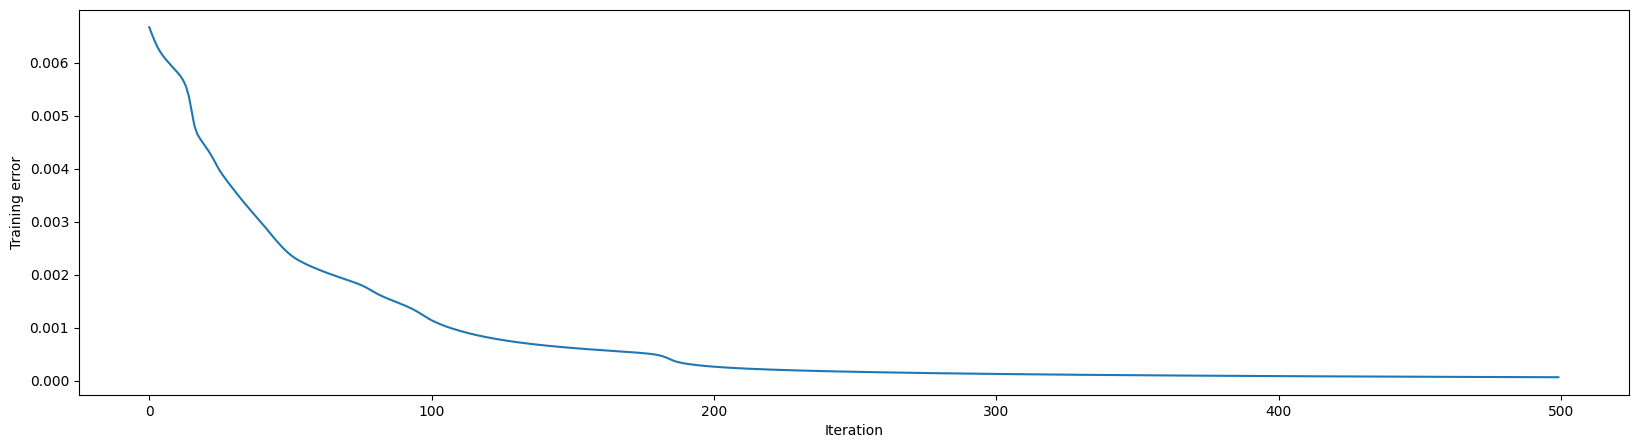

In [87]:
errors, y_pred = runNetwork(500, 0.1)
y_pred_mse = mse(y_test, y_pred)
print('Test Loss: ', y_pred_mse)

plt.figure(figsize=(20, 5))
plt.plot(range(500), errors)
plt.ylabel('Training error')
plt.xlabel('Iteration')
plt.show()

### Effect of Epochs

We trained our model 7 times, each with a different number of epochs. The observations suggests that:

- **Training Error Decrease**: As we increase the number of epochs per training session, our model has more opportunities to learn from the training data. Consequently, the model gets better at fitting this data, which results in a reduced training error. Essentially, the model is adjusting its parameters to minimize the error on the training set as much as possible.

- **Test Error Behavior**: In the initial phase of training (with lower epoch counts), the test error decreases as well, which indicates that the model is learning useful patterns that generalize well to unseen data. However, beyond a certain number of epochs (2000 in out case), we start to observe an increase in test error. This is because the model begins to **overfit** the training data. Overfitting occurs when the model learns not only the underlying patterns but also the noise and specific peculiarities in the training data that don’t generalize to new, unseen data. When this happens, the model’s performance on the test set (or unseen data) deteriorates, leading to higher test errors.

In [88]:
param = [10, 100, 500, 1000, 2000, 5000, 10000]
err_per_param = []
y_per_param = []
for it in param:
    errors, y_pred = runNetwork(it, 0.1)
    y_pred_mse = mse(y_test, y_pred)
    err_per_param.append(errors[-1])
    y_per_param.append(y_pred_mse)

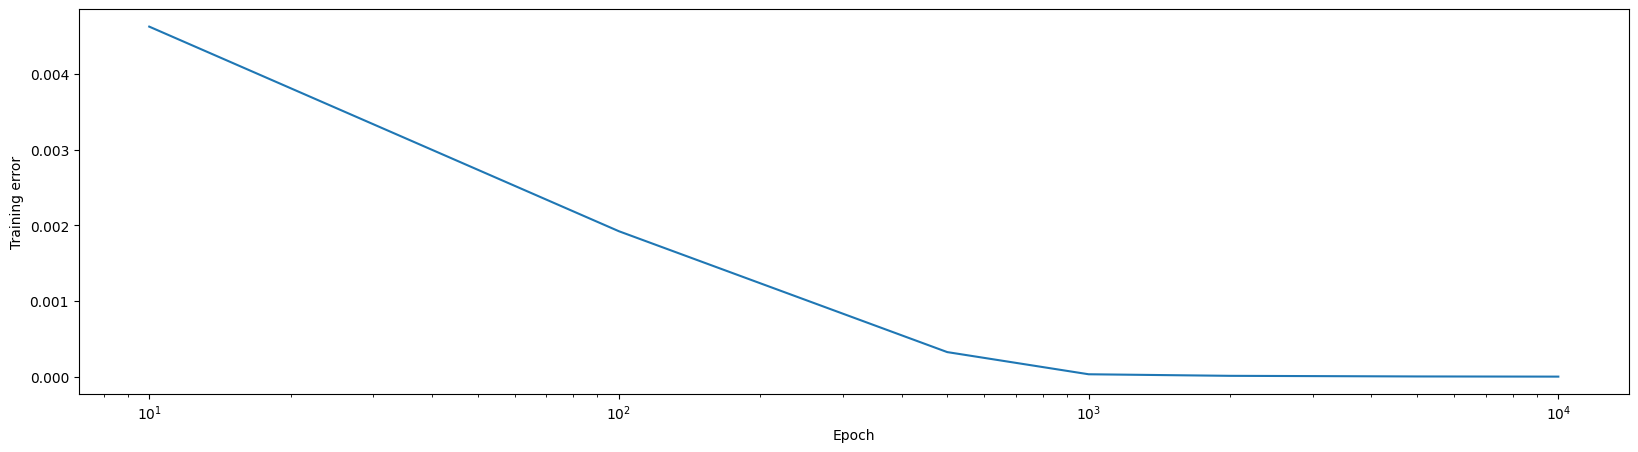

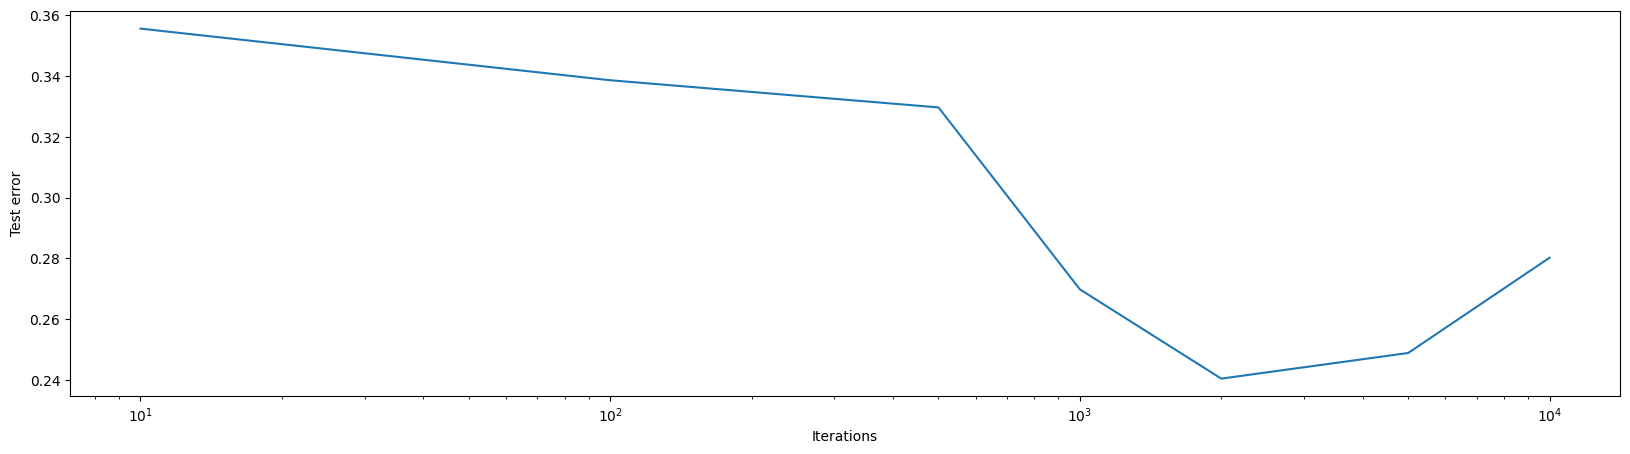

In [89]:
plt.figure(figsize=(20, 5))
plt.plot(param, err_per_param)
plt.xticks(param)
plt.ylabel('Training error')
plt.xlabel('Epoch')
plt.xscale('log')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(param, y_per_param)
plt.xticks(param)
plt.ylabel('Test error')
plt.xlabel('Iterations')
plt.xscale('log')
plt.show()

### Effect of Learning Rate

The learning rate controls how much we adjust the weights of the network with respect to the loss gradient during each update step. 

1. **Very Low Learning Rate (e.g., 0.0001):**
   - **Training Error:** With a very low learning rate, the model takes tiny steps in the direction of the gradient. This results in very slow learning, requiring many iterations to make significant progress. Consequently, the training error remains relatively high because the model has not yet fully learned the patterns in the training data.
   - **Test Error:** Similarly, the test error remains high because the model is underfitting, meaning it has not adequately captured the underlying patterns in the data.

2. **Moderate Learning Rates (e.g., 0.001 to 0.01):**
   - **Training Error:** As the learning rate increases, the model starts learning patterns more quickly. This leads to a decrease in training error as the model rapidly improves its fit to the training data.
   - **Test Error:** During this phase, test error also decreases, indicating better generalization to unseen data since the model is effectively learning the underlying patterns without overfitting.

3. **Optimal Learning Rate (e.g., around 0.1):**
   - **Training Error:** At an optimal learning rate, the model converges efficiently, achieving low training error in a reasonable number of iterations.
   - **Test Error:** Test error is minimized when the learning rate is optimal, as the model generalizes well to new data without overfitting or underfitting.

4. **High Learning Rates (e.g., 1 and above):**
   - **Training Error:** When the learning rate becomes too high, the updates to the weights become too large, causing the model to overshoot the optimal points. This prevents the model from converging properly, leading to higher training error.
   - **Test Error:** The test error also increases significantly because the model struggles to learn a stable set of parameters that generalize well. The large updates can cause erratic changes in the weights, leading to a model that performs poorly on both training and test data.

In [90]:
param = [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
err_per_param = []
y_per_param = []
for lr in param:
    errors, y_pred = runNetwork(500, lr)
    y_pred_mse = mse(y_test, y_pred)
    err_per_param.append(errors[-1])
    y_per_param.append(y_pred_mse)

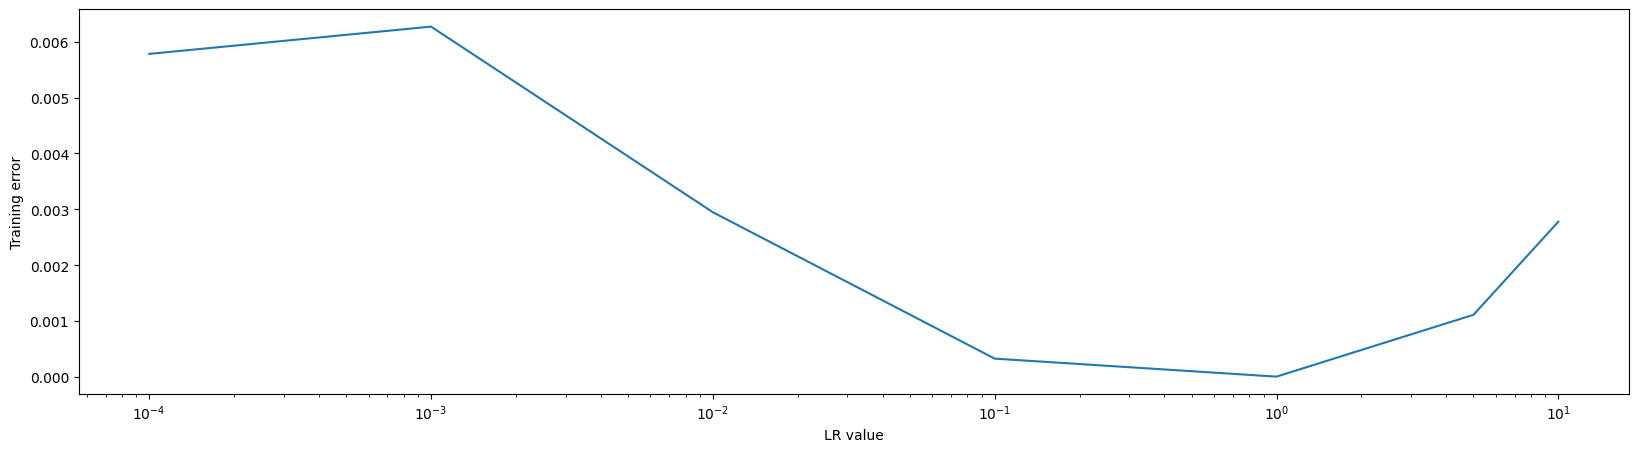

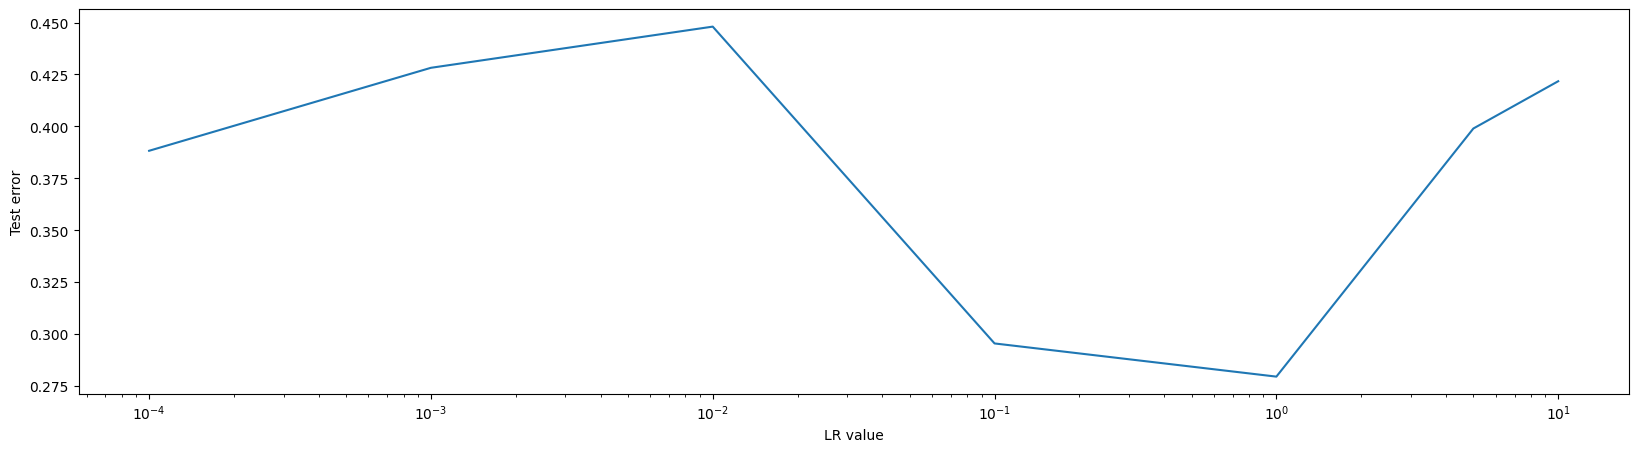

In [91]:
plt.figure(figsize=(20, 5))
plt.plot(param, err_per_param)
plt.xticks(param)
plt.ylabel('Training error')
plt.xlabel('LR value')
plt.xscale('log')
plt.show()

plt.figure(figsize=(20, 5))
plt.plot(param, y_per_param)
plt.xticks(param)
plt.ylabel('Test error')
plt.xlabel('LR value')
plt.xscale('log')
plt.show()